In [42]:
import pandas as pd
from plotnine import *

In [43]:
%ls data

전국도시공원표준데이터.csv


In [44]:
df = pd.read_csv('data/전국도시공원표준데이터.csv', encoding='euc-kr')
df.shape

(13135, 18)

In [45]:
df.isnull().sum()
# 지번주소, 도로명주소 null 값이 많다. 둘 중 하나는 있을 것이므로 주소 쓸때 둘 중 하나를 써주면 되겠지. 

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         5898
소재지지번주소          1204
위도                  6
경도                  6
공원면적               27
공원보유시설(운동시설)     9579
공원보유시설(유희시설)     8418
공원보유시설(편익시설)     9672
공원보유시설(교양시설)    12382
공원보유시설(기타시설)    11040
지정고시일            1939
관리기관명             783
전화번호              925
데이터기준일자             0
Unnamed: 17     13135
dtype: int64

In [46]:
df.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 17'], inplace=True)
# inplace=True 는 모든 데이터에 한하여

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 10 columns):
관리번호        13135 non-null object
공원명         13135 non-null object
공원구분        13135 non-null object
소재지도로명주소    7237 non-null object
소재지지번주소     11931 non-null object
위도          13129 non-null float64
경도          13129 non-null float64
공원면적        13108 non-null object
전화번호        12210 non-null object
데이터기준일자     13135 non-null object
dtypes: float64(2), object(8)
memory usage: 1.0+ MB


In [48]:
df['소재지도로명주소'].fillna(df['소재지지번주소'], inplace = True)

In [49]:
# 시도와 구군 데이터 가져오기
df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[0]
df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[1]
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,시도
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,033-480-2927,2018-02-28,양구군
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,033-480-2927,2018-02-28,양구군
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,033-480-2927,2018-02-28,양구군
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,033-480-2460,2018-02-28,양구군
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,033-480-2576,2018-02-28,양구군


In [50]:
df.isnull().sum()

관리번호           0
공원명            0
공원구분           0
소재지도로명주소       0
소재지지번주소     1204
위도             6
경도             6
공원면적          27
전화번호         925
데이터기준일자        0
시도             0
dtype: int64

In [51]:
# plotnine에 면적 표현용 데이터 만들기
df['공원면적'] = df['공원면적'].str.replace(',', '').astype(float)
df['공원면적그래프용'] = df['공원면적'].apply(lambda x : x * 0.0001)
df['공원면적그래프용'].head()

0     0.1597
1     0.1498
2     0.1499
3     1.8437
4    17.8931
Name: 공원면적그래프용, dtype: float64

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


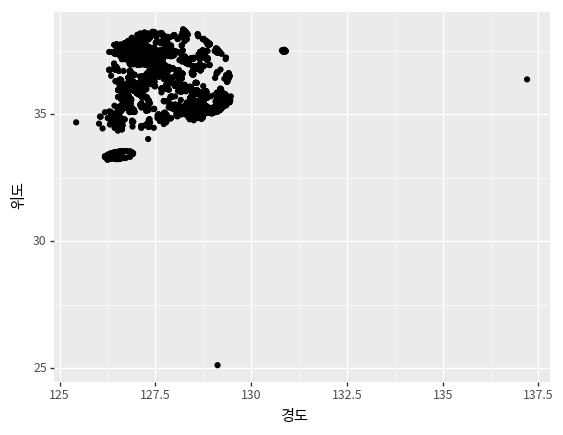

<ggplot: (7557791913)>

In [52]:
(ggplot(df)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='Noto Sans CJK KR'))
)


In [53]:
df = df.loc[(df['위도'] > 32 ) & (df['경도'] < 132) & df['시도'].notnull()]
df.shape

(13127, 12)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


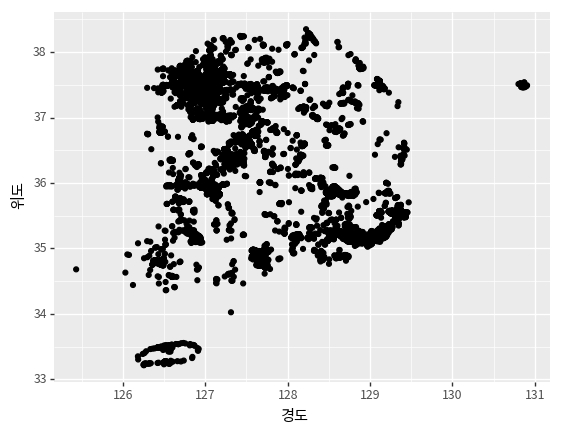

<ggplot: (7543510308)>

In [54]:
(ggplot(df)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='Noto Sans CJK KR'))
)

In [56]:
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
df_sample = df.loc[df['공원구분'].str.match(park_type)]

In [59]:
df_sample.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,시도,공원면적그래프용
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437.0,033-480-2460,2018-02-28,양구군,1.8437
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931.0,033-480-2576,2018-02-28,양구군,17.8931
42,27170-00037,서대구1공원,역사공원,대구광역시 서구 평리동 1341-10,대구광역시 서구 평리동 1341-10,35.868921,128.557541,1967.0,053-663-2866,2018-02-20,서구,0.1967
77,31170-00002,남목체육소공원,체육공원,"울산광역시 동구 동부동 161,164번지","울산광역시 동구 동구 동부동 161,164번지",35.541352,129.433866,4457.0,052-209-3744,2018-01-01,동구,0.4457
78,31170-00001,상진공원,체육공원,울산광역시 동구 방어동 214번지,울산광역시 동구 동구 방어동 214번지,35.481672,129.422393,418.0,052-209-3744,2018-01-01,동구,0.0418


In [68]:
park_do = pd.DataFrame(df['시도'].value_counts())
park_do_normalize = pd.DataFrame(df['시도'].value_counts(normalize=True))
park_sido = park_do.merge(park_do_normalize, left_index=True, right_index=True).reset_index()
park_sido.columns = ['시도', '합계', '비율']
park_sido.sort_values(by=['합계'], ascending=False)
park_sido

,시도,합계,비율
0,전주시,474,0.036109
1,청주시,434,0.033062
2,남구,404,0.030776
3,중구,398,0.030319
4,북구,346,0.026358
5,고양시,341,0.025977
6,창원시,291,0.022168
7,용인시,278,0.021178
8,성남시,266,0.020264
9,수원시,261,0.019883


/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/anaconda3/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


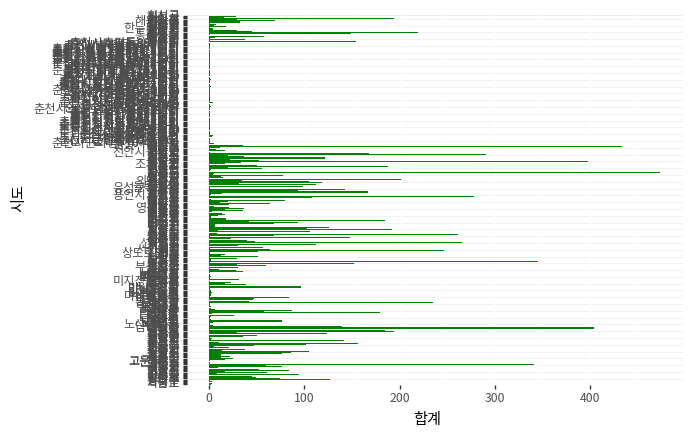

<ggplot: (-9223372029297714011)>

In [71]:
(ggplot(park_sido.sort_values(by=['시도'], ascending=False))
 + aes(x='시도', y='합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip()
 + theme(text=element_text(family='Noto Sans CJK KR'))
)
